# Pose Detection with OpenPose

This notebook uses an open source project [CMU-Perceptual-Computing-Lab/openpose](https://github.com/CMU-Perceptual-Computing-Lab/openpose.git) to detect/track multi person poses on a given youtube video.

For other deep-learning Colab notebooks, visit [tugstugi/dl-colab-notebooks](https://github.com/tugstugi/dl-colab-notebooks).


## Install OpenPose

In [44]:
import os
from os.path import exists, join, basename, splitext

git_repo_url = 'https://github.com/CMU-Perceptual-Computing-Lab/openpose.git'
project_name = splitext(basename(git_repo_url))[0]
if not exists(project_name):
  # see: https://github.com/CMU-Perceptual-Computing-Lab/openpose/issues/949
  # install new CMake becaue of CUDA10
  !wget -q https://cmake.org/files/v3.13/cmake-3.13.0-Linux-x86_64.tar.gz
  !tar xfz cmake-3.13.0-Linux-x86_64.tar.gz --strip-components=1 -C /usr/local
  # clone openpose
  !git clone -q --depth 1 $git_repo_url
  !sed -i 's/execute_process(COMMAND git checkout master WORKING_DIRECTORY ${CMAKE_SOURCE_DIR}\/3rdparty\/caffe)/execute_process(COMMAND git checkout f019d0dfe86f49d1140961f8c7dec22130c83154 WORKING_DIRECTORY ${CMAKE_SOURCE_DIR}\/3rdparty\/caffe)/g' openpose/CMakeLists.txt
  # install system dependencies
  !apt-get -qq install -y libatlas-base-dev libprotobuf-dev libleveldb-dev libsnappy-dev libhdf5-serial-dev protobuf-compiler libgflags-dev libgoogle-glog-dev liblmdb-dev opencl-headers ocl-icd-opencl-dev libviennacl-dev
  # install python dependencies
  !pip install -q youtube-dl
  # build openpose
  !cd openpose && rm -rf build || true && mkdir build && cd build && cmake .. && make -j`nproc`
  
from IPython.display import YouTubeVideo

-- The C compiler identification is GNU 7.5.0
-- The CXX compiler identification is GNU 7.5.0
-- Check for working C compiler: /usr/bin/cc
-- Check for working C compiler: /usr/bin/cc -- works
-- Detecting C compiler ABI info
-- Detecting C compiler ABI info - done
-- Detecting C compile features
-- Detecting C compile features - done
-- Check for working CXX compiler: /usr/bin/c++
-- Check for working CXX compiler: /usr/bin/c++ -- works
-- Detecting CXX compiler ABI info
-- Detecting CXX compiler ABI info - done
-- Detecting CXX compile features
-- Detecting CXX compile features - done
-- GCC detected, adding compile flags
-- GCC detected, adding compile flags
-- Looking for pthread.h
-- Looking for pthread.h - found
-- Looking for pthread_create
-- Looking for pthread_create - not found
-- Looking for pthread_create in pthreads
-- Looking for pthread_create in pthreads - not found
-- Looking for pthread_create in pthread
-- Looking for pthread_create in pthread - found
-- Found Threa

In [45]:
ls

cmake-3.13.0-Linux-x86_64.tar.gz  openpose/


## Detect poses on a test video

We are going to detect poses on the following youtube video:

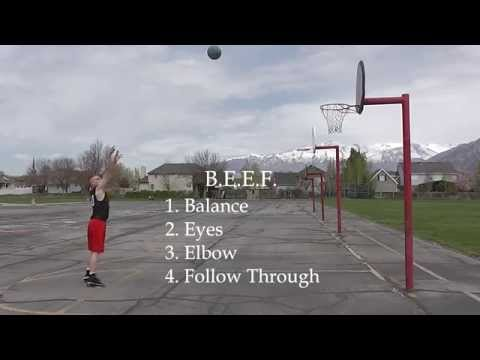

In [46]:

YOUTUBE_ID = 'I1LxUyiL_h0'


YouTubeVideo(YOUTUBE_ID)

Download the above youtube video, cut the first 5 seconds and do the pose detection on that 5 seconds:

In [52]:
!rm -rf youtube.mp4
# download the youtube with the given ID
!youtube-dl -f 'bestvideo[ext=mp4]' --output "youtube.%(ext)s" https://www.youtube.com/watch?v=$YOUTUBE_ID
# cut the first 5 seconds
!ffmpeg -y -loglevel info -i youtube.mp4 -t 6 video.mp4
# detect poses on the these 5 seconds
!rm openpose.avi
!cd openpose && ./build/examples/openpose/openpose.bin --video ../video.mp4 --write_json ./output/ --display 0  --write_video ../openpose.avi
# convert the result into MP4
!ffmpeg -y -loglevel info -i openpose.avi output.mp4

[youtube] I1LxUyiL_h0: Downloading webpage
[download] Destination: youtube.mp4
[download] 100% of 31.73MiB in 00:00
ffmpeg version 3.4.8-0ubuntu0.2 Copyright (c) 2000-2020 the FFmpeg developers
  built with gcc 7 (Ubuntu 7.5.0-3ubuntu1~18.04)
  configuration: --prefix=/usr --extra-version=0ubuntu0.2 --toolchain=hardened --libdir=/usr/lib/x86_64-linux-gnu --incdir=/usr/include/x86_64-linux-gnu --enable-gpl --disable-stripping --enable-avresample --enable-avisynth --enable-gnutls --enable-ladspa --enable-libass --enable-libbluray --enable-libbs2b --enable-libcaca --enable-libcdio --enable-libflite --enable-libfontconfig --enable-libfreetype --enable-libfribidi --enable-libgme --enable-libgsm --enable-libmp3lame --enable-libmysofa --enable-libopenjpeg --enable-libopenmpt --enable-libopus --enable-libpulse --enable-librubberband --enable-librsvg --enable-libshine --enable-libsnappy --enable-libsoxr --enable-libspeex --enable-libssh --enable-libtheora --enable-libtwolame --enable-libvorbis 

In [23]:
%ls

video_000000000000_keypoints.json  video_000000000060_keypoints.json
video_000000000001_keypoints.json  video_000000000061_keypoints.json
video_000000000002_keypoints.json  video_000000000062_keypoints.json
video_000000000003_keypoints.json  video_000000000063_keypoints.json
video_000000000004_keypoints.json  video_000000000064_keypoints.json
video_000000000005_keypoints.json  video_000000000065_keypoints.json
video_000000000006_keypoints.json  video_000000000066_keypoints.json
video_000000000007_keypoints.json  video_000000000067_keypoints.json
video_000000000008_keypoints.json  video_000000000068_keypoints.json
video_000000000009_keypoints.json  video_000000000069_keypoints.json
video_000000000010_keypoints.json  video_000000000070_keypoints.json
video_000000000011_keypoints.json  video_000000000071_keypoints.json
video_000000000012_keypoints.json  video_000000000072_keypoints.json
video_000000000013_keypoints.json  video_000000000073_keypoints.json
video_000000000014_keypoints.json 

Finally, visualize the result:

In [53]:
def show_local_mp4_video(file_name, width=640, height=480):
  import io
  import base64
  from IPython.display import HTML
  video_encoded = base64.b64encode(io.open(file_name, 'rb').read())
  return HTML(data='''<video width="{0}" height="{1}" alt="test" controls>
                        <source src="data:video/mp4;base64,{2}" type="video/mp4" />
                      </video>'''.format(width, height, video_encoded.decode('ascii')))

show_local_mp4_video('output.mp4', width=960, height=720)

In [81]:
from google.colab import files

# I fucked up the directories so this might change
# you can check what directory youre in through [pwd]
# then tack on /openpose/output.zip and /openpose/output for the following lines of code

!zip -r /root/build/openpose/output.zip /root/build/openpose/output
files.download("/root/build/openpose/output.zip")

  adding: root/build/openpose/output/ (stored 0%)
  adding: root/build/openpose/output/video_000000000053_keypoints.json (stored 0%)
  adding: root/build/openpose/output/video_000000000007_keypoints.json (stored 0%)
  adding: root/build/openpose/output/video_000000000049_keypoints.json (stored 0%)
  adding: root/build/openpose/output/video_000000000114_keypoints.json (deflated 51%)
  adding: root/build/openpose/output/video_000000000120_keypoints.json (deflated 59%)
  adding: root/build/openpose/output/video_000000000058_keypoints.json (stored 0%)
  adding: root/build/openpose/output/video_000000000163_keypoints.json (deflated 51%)
  adding: root/build/openpose/output/video_000000000015_keypoints.json (stored 0%)
  adding: root/build/openpose/output/video_000000000132_keypoints.json (deflated 51%)
  adding: root/build/openpose/output/video_000000000145_keypoints.json (deflated 58%)
  adding: root/build/openpose/output/video_000000000042_keypoints.json (stored 0%)
  adding: root/build/o

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>